# Polynomial Regression: Sklearn

In this example, we will go through the implementation of Polynomial Regression, in which we will predict the Salary of a new employee based on his position level in his previous company from the salary data for the same position levels in the new company. In this data, we have the two independent variables namely, Position and Level. There is one independent variable i.e., Salary.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Load data

In [2]:
# load data
url = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/PositionSalaries_Data.csv"
df = pd.read_csv(url)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Explore data

In [3]:
# explore data
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


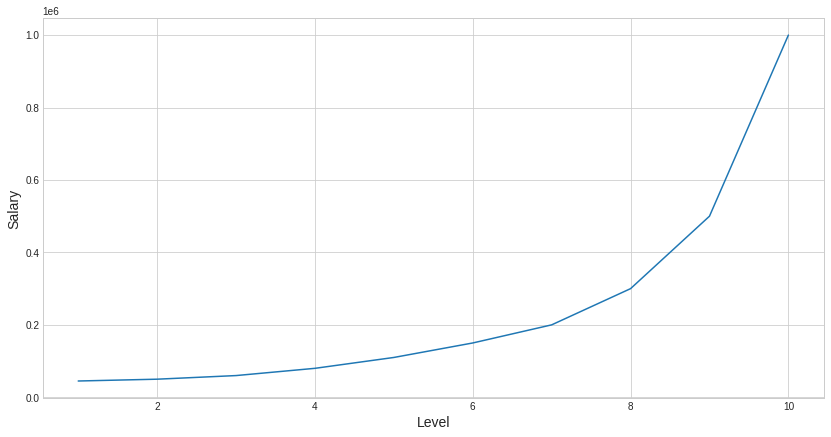

In [4]:
# plot salary against level
plt.figure(figsize=(14,7))
plt.plot(df["Level"], df["Salary"])
plt.xlabel("Level", fontsize=14)
plt.ylabel("Salary", fontsize=14)
plt.show()

## Define features and targets

In [5]:
# create targets (y) and features (X)
y = df["Salary"].values
X = df[["Level"]].values

## Train model

In [6]:
# build polynomial regression model and train it
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Test model

In [7]:
# compare predictions against testing actuals
yhat = lin_reg.predict(X_poly)
eval_df = pd.DataFrame({"Actuals": y, "Predictions": yhat, "%-Error": np.abs(((yhat-y)/y)*100)})
eval_df

,Actuals,Predictions,%-Error
0,45000,53356.643357,18.570319
1,50000,31759.906760,36.480186
2,60000,58642.191142,2.263015
3,80000,94632.867133,18.291084
4,110000,121724.941725,10.659038
5,150000,143275.058275,4.483294
6,200000,184003.496504,7.998252
7,300000,289994.172494,3.335276
8,500000,528694.638695,5.738928
9,1000000,988916.083916,1.108392


In [8]:
# compute mean percentage error
eval_df.loc[:, "%-Error"].mean()

10.892778307593037

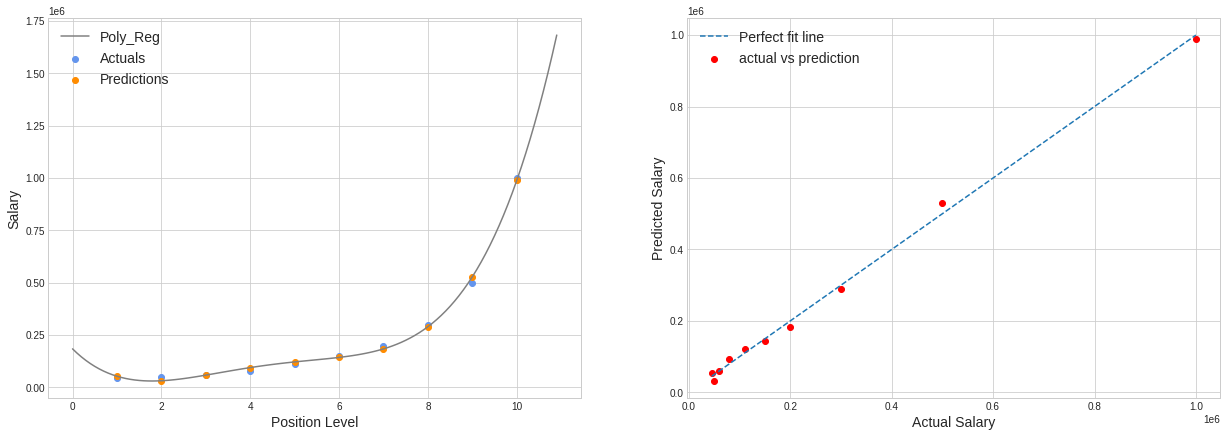

In [9]:
# plot predictions against actuals
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(21,7))

axes[0].scatter(X, y, color="cornflowerblue", label="Actuals")
axes[0].scatter(X, yhat, color="darkorange", label="Predictions")
X_grid = np.arange(min(X)-1, max(X)+1, 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
axes[0].plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'grey', label="Poly_Reg")
axes[0].set_xlabel("Position Level", fontsize=14)
axes[0].set_ylabel("Salary", fontsize=14)
axes[0].legend(fontsize=14)

axes[1].scatter(y, yhat, color="red", label="actual vs prediction")
axes[1].plot(np.arange(min(y), max(y)), np.arange(min(y), max(y)), linestyle="dashed", label="Perfect fit line")
axes[1].set_xlabel("Actual Salary", fontsize=14)
axes[1].set_ylabel("Predicted Salary", fontsize=14)
axes[1].legend(fontsize=14)

plt.show()